<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/26324DR_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR1', 'DR3', 'DR2']

In [ ]:
# for numerical analysis
import numpy as np

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)






train_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                         target_size=(64,64),


                                         class_mode='categorical')


validation_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                              target_size=(64,64),


                                              class_mode='categorical')

test_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                              target_size=(64,64),


                                              class_mode='categorical')


Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [181]:
model.fit(train_data,
          validation_data=validation_data,
          epochs=10,
          batch_size=32)
model.save('DRcnn_model.keras')

Epoch 1/10
3/3 [==============================] - 9s 2s/step - loss: 0.0302 - accuracy: 0.9872 - val_loss: 1.4055 - val_accuracy: 0.7143
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 1.1968 - val_accuracy: 0.7143
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.0566 - accuracy: 0.9744 - val_loss: 1.2631 - val_accuracy: 0.7143
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 1.2476 - val_accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 6s 3s/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 1.1339 - val_accuracy: 0.7143
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.1499 - val_accuracy: 0.6429
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.1734 - val_accuracy: 0.6429
Epoch 8/10
3/3 [=========================

In [232]:
predictions = model.predict(test_data)

1/1 [==============================] - 1s 800ms/step


In [233]:
y_pred = np.argmax(predictions, axis=1)

In [230]:
y_true = test_data.classes

In [234]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[2, 0, 1],
       [1, 4, 1],
       [0, 1, 4]])

In [235]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['DR1','DR2','DR3']))

              precision    recall  f1-score   support

         DR1       0.67      0.67      0.67         3
         DR2       0.80      0.67      0.73         6
         DR3       0.67      0.80      0.73         5

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.72      0.71      0.71        14



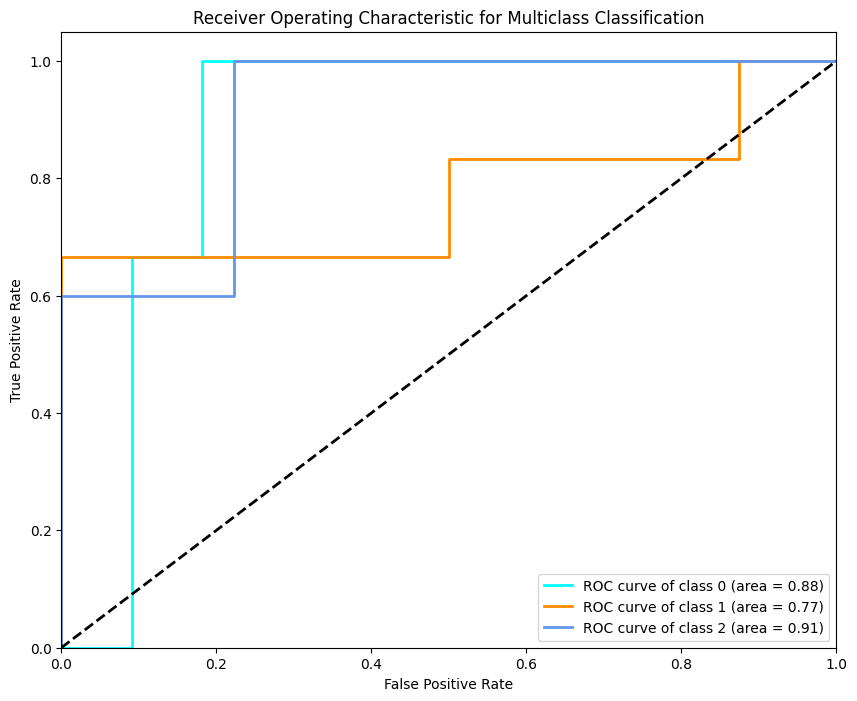

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

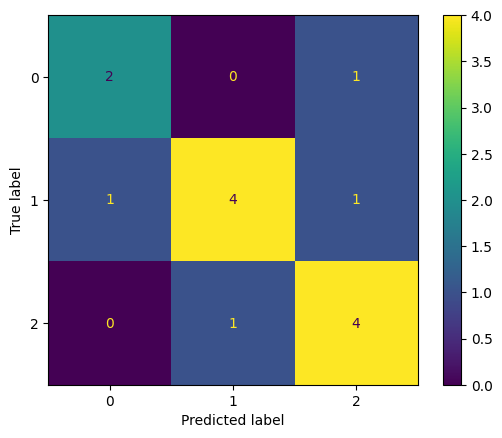

In [241]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [240]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRcnn_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93dd-8d87-11e8-9daf-6045cb817f5b..JPG" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 87ms/step
Prediction: DR2


1/1 [==============================] - 0s 38ms/step
Prediction: DR3


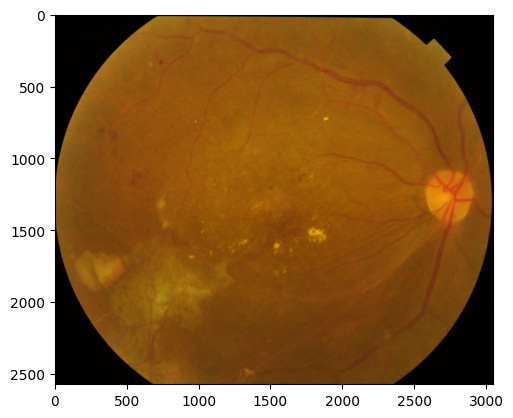

In [243]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 58ms/step
Prediction: DR2


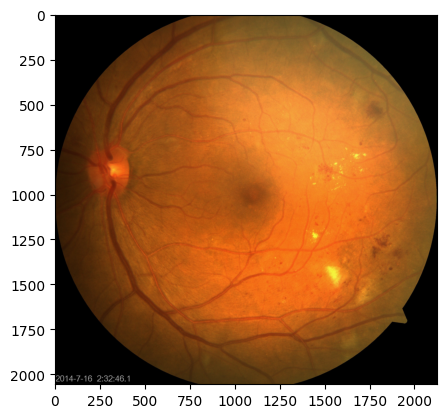

In [244]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93ce-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
testimage = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93ce-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 58ms/step
Prediction: DR1


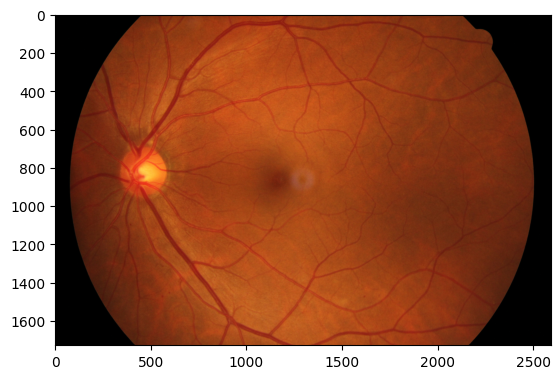

In [245]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR1/1ffa95c2-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
testimage = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR1/1ffa95c2-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


In [237]:
test_data.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}